# Understanding Model Bias vs. Data Bias

**Data Bias**: Occurs when the training data is not representative of the real-world scenario, leading to skewed learning.
**Model Bias**: Arises from the algorithms and methodologies used to train the model, causing systematic errors favoring one outcome over others.

# Objective
We'll identify and address model bias in the Wine dataset, focusing on techniques to mitigate bias resulting from class imbalance.

# Steps

1. **Load and preprocess the Wine dataset**.
2. **Train a biased model** to demonstrate preference for the majority class.
3. **Apply four different techniques** to mitigate this bias.
4. **Evaluate and compare** results quantitatively and qualitatively.

# Step 1: Import Libraries and Load Data
We import necessary libraries and load the Wine dataset. The data is preprocessed, including standardization and conversion to PyTorch tensors.

# Step 2: Define the Model
A simple neural network model is defined using PyTorch for classifying the Wine dataset into three classes.

# Step 3: Train the Biased Model
We train the model using the training dataset, monitoring the loss over epochs to ensure the model is learning.

# Step 4: Evaluate the Biased Model
The model is evaluated using the test dataset. Accuracy, classification report, and confusion matrix are displayed to understand the model's performance.

# Step 5: Mitigation Techniques
We apply four different bias correction methods to the Wine dataset and retrain the model with each method:

### Method 1: Reweighting
Adjust the loss function to give different weights to classes based on their frequency in the training data.

### Method 2: Oversampling
Create more samples of the minority classes by duplicating existing samples, ensuring equal representation of each class.

### Method 3: Undersampling
Reduce the number of samples from the majority class to match the minority class, balancing class distribution.

### Method 4: Synthetic Minority Over-sampling Technique (SMOTE)
Generate synthetic samples for the minority classes by interpolating between existing samples, balancing class distribution while preserving diversity.

# Results
For each method, retrain the model and evaluate its performance on the test dataset. Display accuracy and classification report to compare the effectiveness of each bias correction method.


# Step 1: Import Libraries and Load Data
We import necessary libraries and load the Wine dataset. The data is preprocessed, including standardization and conversion to PyTorch tensors.

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from torch.utils.data import DataLoader, TensorDataset

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
# Load Wine dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = [
    'Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
    'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
    'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'
]
wine_data = pd.read_csv(url, header=None, names=column_names)

# Split data into features and target
X = wine_data.drop('Class', axis=1).values
y = wine_data['Class'].values - 1  # Classes need to be zero-indexed for PyTorch

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


Using device: cuda


# Step 2: Define the Model
A simple neural network model is defined using PyTorch for classifying the Wine dataset into three classes.

In [4]:
# Define a simple neural network
class WineClassifier(nn.Module):
    def __init__(self):
        super(WineClassifier, self).__init__()
        self.fc1 = nn.Linear(13, 50)
        self.fc2 = nn.Linear(50, 3)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize model, criterion and optimizer
model = WineClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# Step 3: Train the Biased Model
We train the model using the training dataset, monitoring the loss over epochs to ensure the model is learning.

In [5]:
# Training function
def train_model(model, train_loader, criterion, optimizer, epochs=50):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        epoch_loss = running_loss / len(train_loader.dataset)
        print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}')

# Train the model
train_model(model, train_loader, criterion, optimizer, epochs=50)


Epoch 1/50, Loss: 0.8944
Epoch 2/50, Loss: 0.8001
Epoch 3/50, Loss: 0.7130
Epoch 4/50, Loss: 0.6335
Epoch 5/50, Loss: 0.5611
Epoch 6/50, Loss: 0.4960
Epoch 7/50, Loss: 0.4365
Epoch 8/50, Loss: 0.3846
Epoch 9/50, Loss: 0.3378
Epoch 10/50, Loss: 0.2983
Epoch 11/50, Loss: 0.2643
Epoch 12/50, Loss: 0.2347
Epoch 13/50, Loss: 0.2094
Epoch 14/50, Loss: 0.1876
Epoch 15/50, Loss: 0.1689
Epoch 16/50, Loss: 0.1536
Epoch 17/50, Loss: 0.1398
Epoch 18/50, Loss: 0.1284
Epoch 19/50, Loss: 0.1179
Epoch 20/50, Loss: 0.1090
Epoch 21/50, Loss: 0.1009
Epoch 22/50, Loss: 0.0940
Epoch 23/50, Loss: 0.0878
Epoch 24/50, Loss: 0.0818
Epoch 25/50, Loss: 0.0768
Epoch 26/50, Loss: 0.0722
Epoch 27/50, Loss: 0.0680
Epoch 28/50, Loss: 0.0643
Epoch 29/50, Loss: 0.0607
Epoch 30/50, Loss: 0.0575
Epoch 31/50, Loss: 0.0547
Epoch 32/50, Loss: 0.0520
Epoch 33/50, Loss: 0.0494
Epoch 34/50, Loss: 0.0470
Epoch 35/50, Loss: 0.0448
Epoch 36/50, Loss: 0.0427
Epoch 37/50, Loss: 0.0408
Epoch 38/50, Loss: 0.0391
Epoch 39/50, Loss: 0.

# Step 4: Evaluate the Biased Model
The model is evaluated using the test dataset. Accuracy, classification report, and confusion matrix are displayed to understand the model's performance.


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



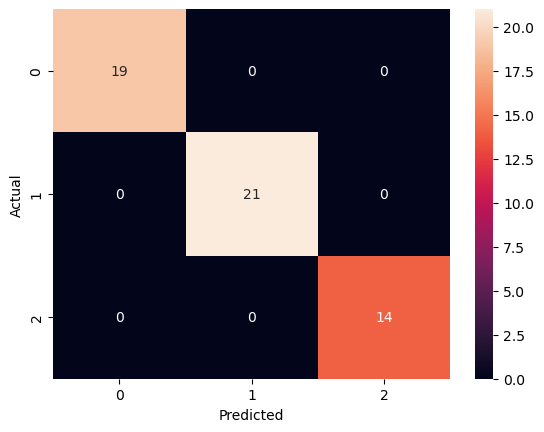

In [6]:
# Evaluation function
def evaluate_model(model, test_loader):
    model.eval()
    predictions = []
    actuals = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            predictions.extend(preds.numpy())
            actuals.extend(labels.numpy())
    return predictions, actuals

# Evaluate the model
predictions, actuals = evaluate_model(model, test_loader)

# Display results
print("Accuracy:", accuracy_score(actuals, predictions))
print(classification_report(actuals, predictions))

# Plotting confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(actuals, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Step 5: Mitigation Techniques
We apply four different bias correction methods to the Wine dataset and retrain the model with each method:


### Method 1: Reweighting
Adjust the loss function to give different weights to classes based on their frequency in the training data.

In [7]:
# Reweighting method
class ReweightingLoss(nn.Module):
    def __init__(self, base_criterion, weights):
        super(ReweightingLoss, self).__init__()
        self.base_criterion = base_criterion
        self.weights = weights

    def forward(self, inputs, targets):
        loss = self.base_criterion(inputs, targets)
        weight = self.weights[targets]
        loss = loss * weight
        return loss.mean()

# Calculate class weights
class_counts = np.bincount(y_train.numpy())
total_samples = len(y_train)
class_weights = total_samples / (len(np.unique(y_train)) * class_counts)
class_weights = torch.tensor(class_weights, dtype=torch.float32)

# Apply reweighting
reweighted_criterion = ReweightingLoss(criterion, class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.001)
train_model(model, train_loader, reweighted_criterion, optimizer, epochs=50)
predictions, actuals = evaluate_model(model, test_loader)
print("Reweighting Method Accuracy:", accuracy_score(actuals, predictions))
print(classification_report(actuals, predictions))


Epoch 1/50, Loss: 0.0236
Epoch 2/50, Loss: 0.0202
Epoch 3/50, Loss: 0.0180
Epoch 4/50, Loss: 0.0159
Epoch 5/50, Loss: 0.0145
Epoch 6/50, Loss: 0.0133
Epoch 7/50, Loss: 0.0118
Epoch 8/50, Loss: 0.0109
Epoch 9/50, Loss: 0.0101
Epoch 10/50, Loss: 0.0093
Epoch 11/50, Loss: 0.0085
Epoch 12/50, Loss: 0.0079
Epoch 13/50, Loss: 0.0073
Epoch 14/50, Loss: 0.0070
Epoch 15/50, Loss: 0.0064
Epoch 16/50, Loss: 0.0061
Epoch 17/50, Loss: 0.0058
Epoch 18/50, Loss: 0.0053
Epoch 19/50, Loss: 0.0050
Epoch 20/50, Loss: 0.0047
Epoch 21/50, Loss: 0.0046
Epoch 22/50, Loss: 0.0042
Epoch 23/50, Loss: 0.0041
Epoch 24/50, Loss: 0.0038
Epoch 25/50, Loss: 0.0036
Epoch 26/50, Loss: 0.0034
Epoch 27/50, Loss: 0.0033
Epoch 28/50, Loss: 0.0031
Epoch 29/50, Loss: 0.0030
Epoch 30/50, Loss: 0.0029
Epoch 31/50, Loss: 0.0027
Epoch 32/50, Loss: 0.0026
Epoch 33/50, Loss: 0.0025
Epoch 34/50, Loss: 0.0024
Epoch 35/50, Loss: 0.0023
Epoch 36/50, Loss: 0.0022
Epoch 37/50, Loss: 0.0021
Epoch 38/50, Loss: 0.0020
Epoch 39/50, Loss: 0.

### Method 2: Oversampling
Create more samples of the minority classes by duplicating existing samples, ensuring equal representation of each class.


In [8]:
# Oversampling method
from torch.utils.data import WeightedRandomSampler

# Calculate sample weights
sample_weights = [class_weights[label] for label in y_train]
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

# Create DataLoader with oversampling
train_loader_oversample = DataLoader(train_dataset, batch_size=16, sampler=sampler)

# Train with oversampling
model = WineClassifier()
optimizer = optim.Adam(model.parameters(), lr=0.001)
train_model(model, train_loader_oversample, criterion, optimizer, epochs=50)
predictions, actuals = evaluate_model(model, test_loader)
print("Oversampling Method Accuracy:", accuracy_score(actuals, predictions))
print(classification_report(actuals, predictions))


Epoch 1/50, Loss: 1.1412
Epoch 2/50, Loss: 1.0455
Epoch 3/50, Loss: 0.9648
Epoch 4/50, Loss: 0.8626
Epoch 5/50, Loss: 0.7927
Epoch 6/50, Loss: 0.7217
Epoch 7/50, Loss: 0.6974
Epoch 8/50, Loss: 0.6142
Epoch 9/50, Loss: 0.5332
Epoch 10/50, Loss: 0.4944
Epoch 11/50, Loss: 0.4582
Epoch 12/50, Loss: 0.3768
Epoch 13/50, Loss: 0.3625
Epoch 14/50, Loss: 0.3439
Epoch 15/50, Loss: 0.3157
Epoch 16/50, Loss: 0.2754
Epoch 17/50, Loss: 0.2239
Epoch 18/50, Loss: 0.2172
Epoch 19/50, Loss: 0.1510
Epoch 20/50, Loss: 0.1664
Epoch 21/50, Loss: 0.1378
Epoch 22/50, Loss: 0.1797
Epoch 23/50, Loss: 0.1313
Epoch 24/50, Loss: 0.1586
Epoch 25/50, Loss: 0.1221
Epoch 26/50, Loss: 0.1246
Epoch 27/50, Loss: 0.1263
Epoch 28/50, Loss: 0.1094
Epoch 29/50, Loss: 0.1257
Epoch 30/50, Loss: 0.0832
Epoch 31/50, Loss: 0.1025
Epoch 32/50, Loss: 0.0704
Epoch 33/50, Loss: 0.0616
Epoch 34/50, Loss: 0.0638
Epoch 35/50, Loss: 0.0744
Epoch 36/50, Loss: 0.0757
Epoch 37/50, Loss: 0.0514
Epoch 38/50, Loss: 0.0662
Epoch 39/50, Loss: 0.

### Method 3: Undersampling
Reduce the number of samples from the majority class to match the minority class, balancing class distribution.

In [9]:
# Undersampling method
from imblearn.under_sampling import RandomUnderSampler

# Apply undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train.numpy(), y_train.numpy())

# Convert back to PyTorch tensors
X_resampled = torch.tensor(X_resampled, dtype=torch.float32)
y_resampled = torch.tensor(y_resampled, dtype=torch.long)
train_dataset_undersample = TensorDataset(X_resampled, y_resampled)
train_loader_undersample = DataLoader(train_dataset_undersample, batch_size=16, shuffle=True)

# Train with undersampling
model = WineClassifier()
optimizer = optim.Adam(model.parameters(), lr=0.001)
train_model(model, train_loader_undersample, criterion, optimizer, epochs=50)
predictions, actuals = evaluate_model(model, test_loader)
print("Undersampling Method Accuracy:", accuracy_score(actuals, predictions))
print(classification_report(actuals, predictions))


Epoch 1/50, Loss: 1.0592
Epoch 2/50, Loss: 0.9750
Epoch 3/50, Loss: 0.8944
Epoch 4/50, Loss: 0.8192
Epoch 5/50, Loss: 0.7473
Epoch 6/50, Loss: 0.6787
Epoch 7/50, Loss: 0.6129
Epoch 8/50, Loss: 0.5527
Epoch 9/50, Loss: 0.4974
Epoch 10/50, Loss: 0.4467
Epoch 11/50, Loss: 0.4012
Epoch 12/50, Loss: 0.3612
Epoch 13/50, Loss: 0.3257
Epoch 14/50, Loss: 0.2946
Epoch 15/50, Loss: 0.2673
Epoch 16/50, Loss: 0.2432
Epoch 17/50, Loss: 0.2222
Epoch 18/50, Loss: 0.2041
Epoch 19/50, Loss: 0.1866
Epoch 20/50, Loss: 0.1724
Epoch 21/50, Loss: 0.1595
Epoch 22/50, Loss: 0.1480
Epoch 23/50, Loss: 0.1376
Epoch 24/50, Loss: 0.1282
Epoch 25/50, Loss: 0.1196
Epoch 26/50, Loss: 0.1117
Epoch 27/50, Loss: 0.1048
Epoch 28/50, Loss: 0.0986
Epoch 29/50, Loss: 0.0930
Epoch 30/50, Loss: 0.0875
Epoch 31/50, Loss: 0.0827
Epoch 32/50, Loss: 0.0783
Epoch 33/50, Loss: 0.0741
Epoch 34/50, Loss: 0.0704
Epoch 35/50, Loss: 0.0669
Epoch 36/50, Loss: 0.0637
Epoch 37/50, Loss: 0.0607
Epoch 38/50, Loss: 0.0579
Epoch 39/50, Loss: 0.

### Method 4: Synthetic Minority Over-sampling Technique (SMOTE)
Generate synthetic samples for the minority classes by interpolating between existing samples, balancing class distribution while preserving diversity.

In [10]:
# SMOTE method
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train.numpy(), y_train.numpy())

# Convert back to PyTorch tensors
X_resampled = torch.tensor(X_resampled, dtype=torch.float32)
y_resampled = torch.tensor(y_resampled, dtype=torch.long)
train_dataset_smote = TensorDataset(X_resampled, y_resampled)
train_loader_smote = DataLoader(train_dataset_smote, batch_size=16, shuffle=True)

# Train with SMOTE
model = WineClassifier()
optimizer = optim.Adam(model.parameters(), lr=0.001)
train_model(model, train_loader_smote, criterion, optimizer, epochs=50)
predictions, actuals = evaluate_model(model, test_loader)
print("SMOTE Method Accuracy:", accuracy_score(actuals, predictions))
print(classification_report(actuals, predictions))


Epoch 1/50, Loss: 1.1204
Epoch 2/50, Loss: 0.9954
Epoch 3/50, Loss: 0.8827
Epoch 4/50, Loss: 0.7794
Epoch 5/50, Loss: 0.6828
Epoch 6/50, Loss: 0.5935
Epoch 7/50, Loss: 0.5118
Epoch 8/50, Loss: 0.4387
Epoch 9/50, Loss: 0.3776
Epoch 10/50, Loss: 0.3264
Epoch 11/50, Loss: 0.2840
Epoch 12/50, Loss: 0.2475
Epoch 13/50, Loss: 0.2189
Epoch 14/50, Loss: 0.1943
Epoch 15/50, Loss: 0.1741
Epoch 16/50, Loss: 0.1573
Epoch 17/50, Loss: 0.1425
Epoch 18/50, Loss: 0.1306
Epoch 19/50, Loss: 0.1198
Epoch 20/50, Loss: 0.1105
Epoch 21/50, Loss: 0.1017
Epoch 22/50, Loss: 0.0953
Epoch 23/50, Loss: 0.0883
Epoch 24/50, Loss: 0.0829
Epoch 25/50, Loss: 0.0773
Epoch 26/50, Loss: 0.0726
Epoch 27/50, Loss: 0.0684
Epoch 28/50, Loss: 0.0645
Epoch 29/50, Loss: 0.0610
Epoch 30/50, Loss: 0.0576
Epoch 31/50, Loss: 0.0546
Epoch 32/50, Loss: 0.0519
Epoch 33/50, Loss: 0.0494
Epoch 34/50, Loss: 0.0469
Epoch 35/50, Loss: 0.0448
Epoch 36/50, Loss: 0.0427
Epoch 37/50, Loss: 0.0408
Epoch 38/50, Loss: 0.0391
Epoch 39/50, Loss: 0.

## Results
For each method, we retrain the model and evaluate its performance on the test dataset. We display the accuracy and classification report to compare the effectiveness of each bias correction method.

In [1]:
# Understanding Model Bias vs. Data Bias

**Data Bias**: Occurs when the training data is not representative of the real-world scenario, leading to skewed learning.
**Model Bias**: Arises from the algorithms and methodologies used to train the model, causing systematic errors favoring one outcome over others.

# Objective
We'll identify and address model bias in the Wine dataset, focusing on techniques to mitigate bias resulting from class imbalance.

# Steps

1. **Load and preprocess the Wine dataset**.
2. **Train a biased model** to demonstrate preference for the majority class.
3. **Apply four different techniques** to mitigate this bias.
4. **Evaluate and compare** results quantitatively and qualitatively.

# Step 1: Import Libraries and Load Data
We import necessary libraries and load the Wine dataset. The data is preprocessed, including standardization and conversion to PyTorch tensors.



# Step 3: Train the Biased Model
We train the model using the training dataset, monitoring the loss over epochs to ensure the model is learning.






### Method 3: Undersampling
Reduce the number of samples from the majority class to match the minority class, balancing class distribution.

### Method 4: Synthetic Minority Over-sampling Technique (SMOTE)
Generate synthetic samples for the minority classes by interpolating between existing samples, balancing class distribution while preserving diversity.

# Results
For each method, retrain the model and evaluate its performance on the test dataset. Display accuracy and classification report to compare the effectiveness of each bias correction method.


SyntaxError: invalid syntax (2926714715.py, line 3)

In [12]:
pip install aif360


Note: you may need to restart the kernel to use updated packages.


In [13]:
from aif360.datasets import AdultDataset
from aif360.algorithms.preprocessing import Reweighing
from aif360.metrics import BinaryLabelDatasetMetric

# Load dataset
dataset = AdultDataset()

# Split dataset into train and test
train, test = dataset.split([0.7], shuffle=True)

# Apply reweighing
RW = Reweighing(unprivileged_groups=[{'race': 0}], privileged_groups=[{'race': 1}])
train_reweighed = RW.fit_transform(train)

# Metrics before reweighing
metric_train = BinaryLabelDatasetMetric(train, unprivileged_groups=[{'race': 0}], privileged_groups=[{'race': 1}])
print("Difference in mean outcomes (before):", metric_train.mean_difference())

# Metrics after reweighing
metric_train_reweighed = BinaryLabelDatasetMetric(train_reweighed, unprivileged_groups=[{'race': 0}], privileged_groups=[{'race': 1}])
print("Difference in mean outcomes (after):", metric_train_reweighed.mean_difference())


IOError: [Errno 2] No such file or directory: '/home/amehmood/anaconda3/envs/main_env/lib/python3.8/site-packages/aif360/datasets/../data/raw/adult/adult.data'
To use this class, please download the following files:

	https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
	https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test
	https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

and place them, as-is, in the folder:

	/home/amehmood/anaconda3/envs/main_env/lib/python3.8/site-packages/aif360/data/raw/adult



AttributeError: 'tuple' object has no attribute 'tb_frame'

In [14]:
pip install aif360


Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
from aif360.datasets import BinaryLabelDataset
from aif360.algorithms.preprocessing import Reweighing
from aif360.metrics import BinaryLabelDatasetMetric

# Convert to AIF360 dataset
train_df = pd.DataFrame(np.hstack([X_train, y_train.values.reshape(-1, 1)]))
train_df.columns = list(range(train_df.shape[1]))
train = BinaryLabelDataset(favorable_label=1, unfavorable_label=0, df=train_df, label_names=[train_df.columns[-1]], protected_attribute_names=[train_df.columns[-2]])

# Apply reweighing
RW = Reweighing(unprivileged_groups=[{train_df.columns[-2]: 0}], privileged_groups=[{train_df.columns[-2]: 1}])
train_reweighed = RW.fit_transform(train)

# Metrics before reweighing
metric_train = BinaryLabelDatasetMetric(train, unprivileged_groups=[{train_df.columns[-2]: 0}], privileged_groups=[{train_df.columns[-2]: 1}])
print("Difference in mean outcomes (before):", metric_train.mean_difference())

# Metrics after reweighing
metric_train_reweighed = BinaryLabelDatasetMetric(train_reweighed, unprivileged_groups=[{train_df.columns[-2]: 0}], privileged_groups=[{train_df.columns[-2]: 1}])
print("Difference in mean outcomes (after):", metric_train_reweighed.mean_difference())


2024-07-13 11:45:03.836996: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-13 11:45:03.839163: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-13 11:45:03.860942: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-13 11:45:03.861901: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-13 11:45:04.670858: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

In [16]:
pip install aif360 tensorflow


  Using cached typing_extensions-4.5.0-py3-none-any.whl.metadata (8.5 kB)
Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastapi 0.111.0 requires typing-extensions>=4.8.0, but you have typing-extensions 4.5.0 which is incompatible.
pydantic 2.7.4 requires typing-extensions>=4.6.1, but you have typing-extensions 4.5.0 which is incompatible.
pydantic-core 2.18.4 requires typing-extensions!=4.7.0,>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.
torch 2.3.1 requires typing-extensions>=4.8.0, but you have typing-extensions 4.5.0 which is incompatible.
torchattacks 3.5.1 requires requests~=

In [1]:
from aif360.datasets import BankDataset
from aif360.algorithms.inprocessing import AdversarialDebiasing
import tensorflow as tf

# Load dataset
dataset = BankDataset()

# Split dataset into train and test
train, test = dataset.split([0.7], shuffle=True)

# Apply adversarial debiasing
sess = tf.Session()
debiased_model = AdversarialDebiasing(privileged_groups=[{'age': 1}], unprivileged_groups=[{'age': 0}], scope_name='debiasing', sess=sess)
debiased_model.fit(train)

# Evaluate the model
preds = debiased_model.predict(test)
metric_test = BinaryLabelDatasetMetric(preds, unprivileged_groups=[{'age': 0}], privileged_groups=[{'age': 1}])
print("Difference in mean outcomes (after):", metric_test.mean_difference())


2024-07-13 11:28:49.662599: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-13 11:28:49.663835: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-13 11:28:49.690042: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-13 11:28:49.690812: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-13 11:28:50.440589: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

IOError: [Errno 2] No such file or directory: '/home/amehmood/anaconda3/envs/main_env/lib/python3.8/site-packages/aif360/datasets/../data/raw/bank/bank-additional-full.csv'
To use this class, please download the following file:

	https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip

unzip it and place the files, as-is, in the folder:

	/home/amehmood/anaconda3/envs/main_env/lib/python3.8/site-packages/aif360/data/raw/bank



AttributeError: 'tuple' object has no attribute 'tb_frame'

In [2]:
pip install fairlearn


  Using cached numpy-1.24.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.1 requires numpy<=1.24.3,>=1.22, but you have numpy 1.24.4 which is incompatible.
torchattacks 3.5.1 requires requests~=2.25.1, but you have requests 2.32.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [1]:
from fairlearn.postprocessing import ThresholdOptimizer
from fairlearn.metrics import demographic_parity_difference
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
columns = ['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment', 'installment_rate', 'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 'age', 'other_payment_plans', 'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone', 'foreign_worker', 'class']
data = pd.read_csv(url, delimiter=' ', header=None, names=columns)

# Preprocess data
X = data.drop(columns=['class'])
y = (data['class'] == 1).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train initial model
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

# Apply equalized odds postprocessing
postprocess_est = ThresholdOptimizer(estimator=model, constraints="equalized_odds", prefit=True)
postprocess_est.fit(X_train, y_train, sensitive_features=X_train[:, -1])

# Evaluate the model
preds_before = model.predict(X_test)
preds_after = postprocess_est.predict(X_test, sensitive_features=X_test[:, -1])

print("Demographic parity difference before:", demographic_parity_difference(y_test, preds_before, sensitive_features=X_test[:, -1]))
print("Demographic parity difference after:", demographic_parity_difference(y_test, preds_after, sensitive_features=X_test[:, -1]))


ValueError: could not convert string to float: 'A12'

In [2]:
pip install fairlearn


Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
data = pd.read_csv(url, header=None, names=columns, na_values=' ?', skipinitialspace=True)

# Drop rows with missing values
data.dropna(inplace=True)

# Separate features and target
X = data.drop(columns=['income'])
y = (data['income'] == ' >50K').astype(int)

# Split data into train and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['number']).columns

# Create a column transformer with one-hot encoding for categorical features and scaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Create a preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Preprocess the training and test data
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)


ValueError: Found unknown categories ['Holand-Netherlands'] in column 7 during transform

In [6]:
from fairlearn.reductions import ExponentiatedGradient, EqualizedOdds
from fairlearn.metrics import equalized_odds_difference
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
data = pd.read_csv(url, header=None, names=columns, na_values=' ?', skipinitialspace=True)

# Drop rows with missing values
data.dropna(inplace=True)

# Separate features and target
X = data.drop(columns=['income'])
y = (data['income'] == ' >50K').astype(int)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['number']).columns

# Create a column transformer with one-hot encoding for categorical features and scaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Create a preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Preprocess the training and test data
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Train initial model
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

# Apply exponentiated gradient for equalized odds
mitigator = ExponentiatedGradient(model, EqualizedOdds(), eps=0.01)
mitigator.fit(X_train, y_train, sensitive_features=X_train[:, X.columns.get_loc('sex')])

# Evaluate the model
preds_before = model.predict(X_test)
preds_after = mitigator.predict(X_test, sensitive_features=X_test[:, X.columns.get_loc('sex')])

print("Equalized odds difference before:", equalized_odds_difference(y_test, preds_before, sensitive_features=X_test[:, X.columns.get_loc('sex')]))
print("Equalized odds difference after:", equalized_odds_difference(y_test, preds_after, sensitive_features=X_test[:, X.columns.get_loc('sex')]))


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0